In [64]:
# from glob import iglob
# import os
# f = iglob(f"./lfw/*")
# for i in f:
#     name = i.split("/")[-1]
#     files = iglob(f"./lfw/{name}/*")
#     index = 0
#     os.system(f"mkdir -p ./data/test/{name}")
#     os.system(f"mkdir -p ./data/train/{name}")
#     print(i)
#     for j in files:
#         index += 1
#         if index % 2 == 0:
#             os.system(f"cp {j} ./data/train/{name}")
#         else:
#             os.system(f"cp {j} ./data/test/{name}")
        

#sepreate train and test data
#移動./lfw 到data/train data/test資料夾

In [ ]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


transform = transforms.Compose(
    [
        transforms.Resize((32, 32)),#resize the image to 32*32，有副作用會導致圖片模糊
         # netural network 的 in_features 不知道怎麼調，所以resize成32*32
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = datasets.ImageFolder(root='./data/train/', transform=transform)
# dataset = datasets.ImageFolder(root='./', transform=transform)
trainloader = torch.utils.data.DataLoader(dataset, batch_size=4,
                                          shuffle=True, num_workers=2)

dataset = datasets.ImageFolder(root='./data/test/', transform=transform)
# dataset = datasets.ImageFolder(root='./', transform=transform)
testloader = torch.utils.data.DataLoader(dataset, batch_size=4,
                                          shuffle=True, num_workers=2)

classes = dataset.classes




Hu_Jintao Arye_Mekel Roh_Moo-hyun Colin_Powell


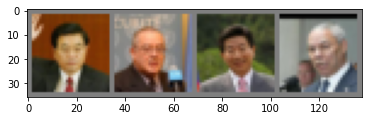

In [108]:
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [78]:
images.size()

torch.Size([4, 3, 32, 32])

In [91]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 5749)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [92]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [102]:
for epoch in range(10):  # loop over the dataset multiple times
    #loop 2次準確率1%, loop 4次準確率2% loop 10次準確率4%
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
            
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

Finished Training


GroundTruth:  George_W_Bush Ira_Einhorn Aleksander_Voloshin Charla_Moye


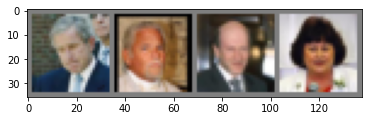

In [103]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [104]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  Colin_Powell George_W_Bush Jack_Straw Laura_Bush


In [105]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 4 %
